In [44]:
install.packages("ggstatsplot")

also installing the dependencies ‘mc2d’, ‘bayestestR’, ‘datawizard’, ‘prismatic’, ‘effectsize’, ‘WRS2’, ‘zeallot’, ‘correlation’, ‘insight’, ‘paletteer’, ‘parameters’, ‘performance’, ‘statsExpressions’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [49]:
library(data.table)
suppressMessages(library(dplyr))
library(ggplot2)
library(ggstatsplot)

# load and process data

In [18]:
data = fread("final_public_school_data.txt", data.table = F)
data = data %>% select(campus_name, total_student_cases, total_staff_cases, school_enrollment)
data = data %>% filter(campus_name %like% " MIDDLE" | campus_name %like% " EL" | campus_name %like% " H S")

# label school type
data$school_type = ifelse(data$campus_name %like% " MIDDLE", "MIDDLE", NA)
data$school_type = ifelse(data$campus_name %like% " EL", "EL", data$school_type)
data$school_type = ifelse(data$campus_name %like% " H S", "HS", data$school_type)

table(data$school_type)

head(data)


    EL     HS MIDDLE 
  3723   1262   1007 

,campus_name,total_student_cases,total_staff_cases,school_enrollment,school_type
,<chr>,<dbl>,<int>,<chr>,<chr>
1,CAYUGA MIDDLE,11,4,137,MIDDLE
2,CAYUGA EL,11,4,241,EL
3,CAYUGA H S,16,14,163,HS
4,ELKHART EL,5,16,313,EL
5,ELKHART MIDDLE,14,5,265,MIDDLE
6,ELKHART H S,21,7,330,HS


In [25]:
data$school_enrollment = as.numeric(data$school_enrollment)
data$pct_student_cases = (data$total_student_cases / data$school_enrollment) * 100

data[is.na(data$pct_student_cases),]

,campus_name,total_student_cases,total_staff_cases,school_enrollment,school_type,pct_student_cases
,<chr>,<dbl>,<int>,<dbl>,<chr>,<dbl>
107,BELTON NEW TECH H S AT WASKOW,16.0,4,NA,HS,NA
205,HARLANDALE ALTERNATIVE CENTER BOOT H S,15.0,3,NA,HS,NA
212,HAC DAEP H S,0.0,2,NA,HS,NA
1402,BARACK OBAMA EL MALE LEADERSHIP ACADEMY (CLOSED),9.0,0,NA,EL,NA
1523,MEMORIAL PATHWAY ACADEMY H S,23.0,6,NA,HS,NA
2241,LOTT EL (CLOSED),0.0,2,NA,EL,NA
2270,DR THOMAS E RANDLE H S (CLOSED),0.0,5,NA,HS,NA
3109,AUTUMN CREEK EL,30.0,1,NA,EL,NA
3902,FALLS CITY EL,13.0,1,NA,EL,NA


In [26]:
data2 = data[!is.na(data$school_enrollment),] # remove NAs

nrow(data2[is.na(data2$school_enrollment),])
nrow(data2[is.na(data2$pct_student_cases),])

[1] 0

[1] 0

In [17]:
data2$school_type = factor(data2$school_type, levels = c("EL", "MIDDLE", "HS")) # set x-axis order to EL, MIDDLE, and HS 

In [27]:
head(data2,2)

,campus_name,total_student_cases,total_staff_cases,school_enrollment,school_type,pct_student_cases
,<chr>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,CAYUGA MIDDLE,11,4,137,MIDDLE,8.029197
2,CAYUGA EL,11,4,241,EL,4.564315


# plot

png 
  2

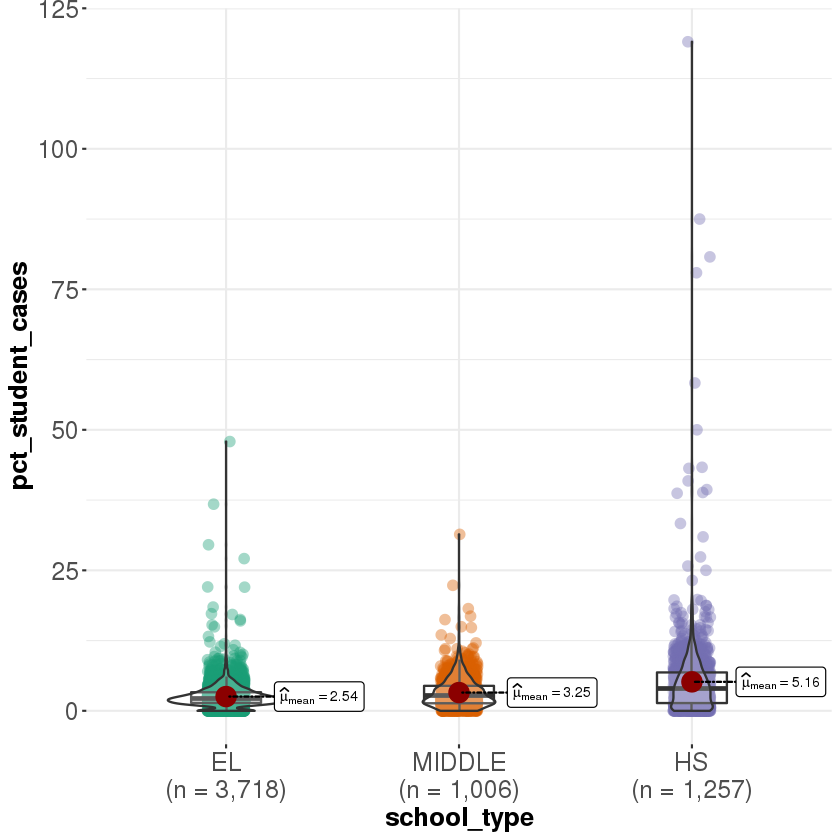

In [34]:
plt <- ggbetweenstats(
    data = data2,
    x = school_type,
    y = pct_student_cases,
    results.subtitle = F,
    pairwise.comparisons = FALSE
)

plt = plt + theme(axis.text = element_text(size = 15), axis.title = element_text(size = 15), plot.subtitle = element_text(size = 25)) 

png("boxplot.png", res = 400, width = 3000, height = 3000)
plt
dev.off()

plt

# remove outliers

In [35]:
# https://www.r-bloggers.com/2020/01/how-to-remove-outliers-in-r/

Q <- quantile(data2$pct_student_cases, probs=c(.25, .75), na.rm = FALSE)
iqr <- IQR(data2$pct_student_cases)
up <-  Q[2]+1.5*iqr # Upper Range  
low<- Q[1]-1.5*iqr # Lower Range﻿
eliminated<- subset(data2, data2$pct_student_cases > (Q[1] - 1.5*iqr) & data2$pct_student_cases < (Q[2]+1.5*iqr))

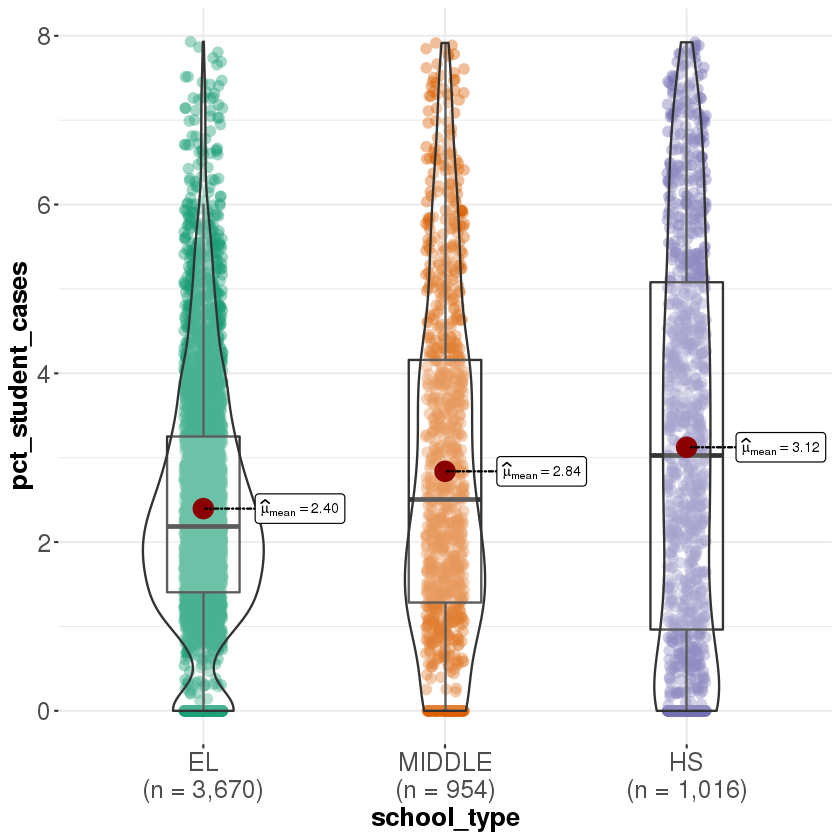

In [36]:
plt <- ggbetweenstats(
    data = eliminated,
    x = school_type,
    y = pct_student_cases,
    results.subtitle = F,
    pairwise.comparisons = FALSE
)

plt = plt + theme(axis.text = element_text(size = 15), axis.title = element_text(size = 15), plot.subtitle = element_text(size = 25)) 

plt

# remove outliers independently per group

In [38]:
outliers <- c(boxplot(data2[data2$school_type == "EL",]$pct_student_cases, plot=FALSE)$out, # outliers for el
              boxplot(data2[data2$school_type == "MIDDLE",]$pct_student_cases, plot=FALSE)$out, # outliers for middle
              boxplot(data2[data2$school_type == "HS",]$pct_student_cases, plot=FALSE)$out) # outliers for hs
nrow(data2)
eliminated = data2[!data2$pct_student_cases %in% outliers,] 
nrow(eliminated)

[1] 5981

[1] 5784

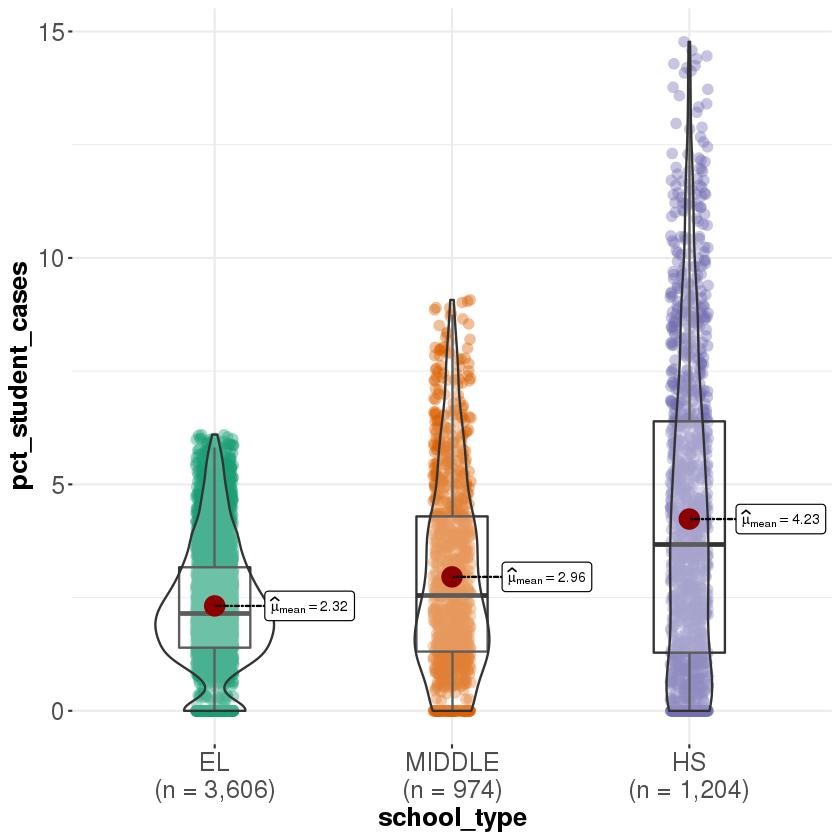

In [39]:
plt <- ggbetweenstats(
    data = eliminated,
    x = school_type,
    y = pct_student_cases,
    results.subtitle = F,
    pairwise.comparisons = FALSE
)

plt = plt + theme(axis.text = element_text(size = 15), axis.title = element_text(size = 15), plot.subtitle = element_text(size = 25)) 

plt